# Section 15: Python for Machine Learning: Linear Regression

# 00 -Machine Learning with Python and Scikit-Learn

In [32]:
# - We are going to be using the Sckikit-Learn Package -> Already has many algorithms built in 
# - Install with conda install scikit-learn

# Every algorithm in scikit-learn is exposed through an estimator 

# First we import the model with the following general form: 
# from sklearn.family import Model

##e.g. 

In [33]:
from sklearn.linear_model import LinearRegression ## Linear Regression -> Estimator object
                                                  ## linear_model -> Family of models 
    
## Estimator parameters 
## -All the parameters of an estimator can be set when it is instantiated, and have suitable default values. 
## -Values can be explored with the shortcut shift+tab in jupyter 

## Example 

model = LinearRegression(normalize = True) ##normalize is a parameter than can be specified 

## Lets check the model
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [38]:
## Once we have a model created with some parameters, its time to fit our model on some data! 
## Remember -> It is recommended to split this data into a test and training set 

##Example with some fake data:
import numpy as np
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5,2)), range(5) ##X is our data and y is our label vector for each row of features 
print(X)
print(y)

##Lets split this data into a train and test sets: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


In [39]:
X_train  ##Features for training data

array([[4, 5],
       [6, 7],
       [0, 1]])

In [40]:
X_test  ##Features for test data

array([[8, 9],
       [2, 3]])

In [41]:
y_train ##Labels for training data

[2, 3, 0]

In [42]:
y_test ##Labels for test data 

[4, 1]

In [ ]:
### Now that we have split the data, we can train/fit our model on the training data. 

### This is done through the model.fit() method 

In [43]:
model.fit(X_train, y_train) ##Modelhas been fit and trained on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [44]:
## Model is ready to predict labels and values (Supervised learning process)
## To do so we use the predict method and the test data:

predictions = model.predict(X_test)

In [45]:
predictions

array([4., 1.])

In [ ]:
## Now we can evaluate out model by comparing the predictions to the correct values. 
 
## The evaluation method depends on what sort of machines learning algorithm we are using 
#  (e.g. Regression, Classification, Clustering, etc...)

In [46]:
## Scikit-learn strives to have a uniform interface across all methods, and we'll see examples of these below 

## -Given a scikit estimator object, the following methods are available: 

## ALL ESTIMATORS
## Available on all estimators: 
##    - model.fit(): fits the training data
##    - For supervised learning applications -> This accepts two arguments, the data X and ther labels y:
##      model.fit(X,y)
##    - For unsupervised learning applications , this accepts only a single argument, the data X:
##      model.fit(X)

## SUPERVISED ESTIMATORS 
## Available in supervised estimators
##    - model.predict(): Given a trained model, predict the label of a new set of data. This method accepts one
##      argument, the new data X_new and returns a learned label for each object in the array 


## Available in supervised estimators 
##    - model.predict_proba(): For classification problems, some estimators also provide this method, which returns 
##      the probability that a new observation has each categorical label. In this case, the label with the highest 
##      probability is returned by model.predict()


## Available in supervised estimators 
##    - model.score(): For classification or regression problems , most estimators implement a score method. 
##      Scores are between 0 and 1, with a larger score indicating a better fit. 


## UNSUPERVISED ESTIMATORS 
## Also available in unsupervised estimators 
##    - model.predict(): predict labels in clustering algorithms 

## Available in unsupervised estimators 
##    - model.transform(): Given an unsupervised model, transform new data into the new basis. This also accepts one
##      argument X_new, and returns the new representation of the data based on the unsupervised model. 

## Available in unsupervised estimators 
##    - model.fit_transform(): Some estimators implement this method, which more efficiently performs a fit and a 
##      transform on the same input data. 

# 01 - Linear Regression Theory

In [48]:
## Consider the following example: 
points = np.array([[2,4], [5,10]])
points

array([[ 2,  4],
       [ 5, 10]])

In [50]:
import pandas as pd
points_pd = pd.DataFrame(data = points, columns = ['x','y'])

points_pd

,x,y
0,2,4
1,5,10


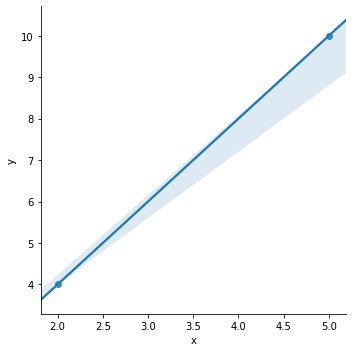

In [55]:
## A perfect fit!
import seaborn as sns 
sns.lmplot(data = points_pd, x = 'x', y = 'y')

In [56]:
## In Linear Regression, all we're trying to do when we calculate our regression line is to draw a line that's 
## close as possible to every dot. 

## For classic Linear Regression, or "Least Squares Method" you only measure the closeness in the "up and down" 
## direction. -> Goal is to minimize vertical distance between all data points in our line. 
##            -> Best line -> Attempt to minimize the distance between all the points and the distance to the line

## MINIMIZATION PROBLEM! -> LSM -> Minimizes the sum of squares of the residuals. 
##                              -> Residuals for an observation is the difference between the observation (y-value) 
##                                 and the fitted line.